* 分析实验结果并绘制训练集和测试集的loss曲线

**回归任务**

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms
%matplotlib inline

In [2]:
#生成数据
features = torch.rand(10000, 500)
labels = (0.0056 * features).sum(dim=1) + 0.028
labels += torch.tensor(np.random.normal(0,0.001,size=labels.size()), dtype=torch.float)

train_features = features[:7000,:]
train_labels = labels[:7000]

test_features = features[7000:,:]
test_labels = labels[7000:]

In [3]:
#生成数据迭代器
train_dataset = torch.utils.data.TensorDataset(train_features, train_labels)
test_dataset = torch.utils.data.TensorDataset(test_features, test_labels)
train_iter = torch.utils.data.DataLoader(train_dataset, batch_size=100, shuffle=True)
test_iter = torch.utils.data.DataLoader(test_dataset, batch_size=100, shuffle=False)

In [27]:
#参数初始化
# w = torch.tensor(np.random.normal(0,0.01,(500,1)), dtype=torch.float)
# b = torch.zeros(1, dtype=torch.float)
# w.requires_grad_(requires_grad=True)
# b.requires_grad_(requires_grad=True)
num_inputs, num_outputs, num_hiddens = 500, 1, 250
W1 = torch.tensor(np.random.normal(0, 0.01, (num_inputs, num_hiddens)), dtype=torch.float)
b1 = torch.zeros(num_hiddens, dtype = torch.float)
W2 = torch.tensor(np.random.normal(0, 0.01, (num_hiddens, num_outputs)), dtype=torch.float)
b2 = torch.zeros(num_outputs,dtype=torch.float)

params = [W1,b1,W2,b2]
for param in params:
    param.requires_grad_(requires_grad=True)

In [19]:
#定义激活函数
def sigmoid(x):
    return 1.0/(1.0+torch.exp(-x))

In [20]:
#定义网络
# def net(X,w,b):
#     return torch.mm(X,w) +b

def net(X):
    X = X.view((-1, num_inputs))
    H = sigmoid(torch.matmul(X, W1) + b1)
    return torch.matmul(H, W2) + b2

In [21]:
#定义损失函数
def squared_loss(y_hat,y):
    return (y_hat-y.view(y_hat.size()))**2/2  #这里修改了
loss = squared_loss

In [22]:
#定义优化方法
def sgd(params,lr,batch_size):
    for param in params:
        param.data -= lr*param.grad/batch_size

optimizer=sgd

In [28]:
def train(train_features,train_labels,test_features,test_labels,train_iter,loss,num_epochs,batch_size=100,lr=0.001):
    train_ls, test_ls = [], []
    for epoch in range(num_epochs):
        ls = 0
        count = 0
        for X, y  in train_iter:
            l = loss(net(X),y).sum()
            l.backward()
            sgd([W1,b1,W2,b2],lr,batch_size)
            W1.grad.data.zero_()
            b1.grad.data.zero_()
            W2.grad.data.zero_()
            b2.grad.data.zero_()
            ls += l.item()
            count += y.shape[0]
        train_ls.append(ls/count)
        ls = 0
        count = 0
        # 每一个epoch测试一次
        for X,y in test_iter:
            l = loss(net(X),y).sum()
            ls += l.item()
            count += y.shape[0]
        test_ls.append(ls/count)        
        print('epoch %d,train loss: %f, test loss: %f'%(epoch+1,train_ls[-1],test_ls[-1]))
    return train_ls, test_ls

In [29]:
train_ls, test_ls = train(train_features,train_labels,test_features,test_labels,train_iter,loss,10,100,0.0001)

epoch 1,train loss: 0.669051, test loss: 0.410614
epoch 2,train loss: 0.273060, test loss: 0.167559
epoch 3,train loss: 0.111523, test loss: 0.068504
epoch 4,train loss: 0.045723, test loss: 0.028196
epoch 5,train loss: 0.018955, test loss: 0.011813
epoch 6,train loss: 0.008082, test loss: 0.005168
epoch 7,train loss: 0.003670, test loss: 0.002475
epoch 8,train loss: 0.001882, test loss: 0.001384
epoch 9,train loss: 0.001156, test loss: 0.000942
epoch 10,train loss: 0.000862, test loss: 0.000764


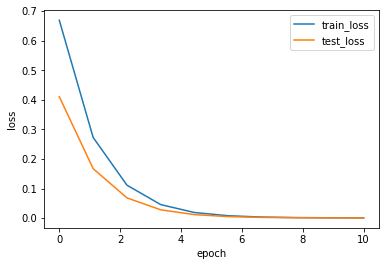

In [30]:
x = np.linspace(0,len(train_ls),len(train_ls))
plt.plot(x,train_ls,label='train_loss',linewidth=1.5)
plt.plot(x,test_ls,label='test_loss',linewidth=1.5)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

**二分类问题**

In [37]:
#生成数据
x1 = torch.tensor(np.random.normal(2,1,(10000,200)), dtype=torch.float)
x1_labels = torch.ones((10000))
x2 = torch.tensor(np.random.normal(-2,1,(10000,200)), dtype=torch.float)
x2_labels = torch.zeros((10000))
class_2_features = torch.cat((x1,x2),dim=0)
class_2_labels = torch.cat((x1_labels,x2_labels))
index = [i for i in range(len(class_2_labels))]
np.random.shuffle(index)
train_class_2_features = class_2_features[index[:14000],:]
test_class_2_features = class_2_features[index[14000:],:]
train_class_2_labels = class_2_labels[index[:14000]]
test_class_2_labels = class_2_labels[index[14000:]]

In [260]:
#生成数据迭代器
train_dataset = torch.utils.data.TensorDataset(train_class_2_features, train_class_2_labels)
test_dataset = torch.utils.data.TensorDataset(test_class_2_features, test_class_2_labels)
train_iter = torch.utils.data.DataLoader(train_dataset, batch_size=100, shuffle=True)
test_iter = torch.utils.data.DataLoader(test_dataset, batch_size=100, shuffle=False)

In [306]:
#定义模型参数
num_inputs, num_outputs, num_hiddens = 200, 1, 100

W1 = torch.tensor(np.random.normal(0, 0.01, (num_inputs, num_hiddens)), dtype=torch.float)
b1 = torch.zeros(num_hiddens, dtype = torch.float)
W2 = torch.tensor(np.random.normal(0, 0.01, (num_hiddens, num_outputs)), dtype=torch.float)
b2 = torch.zeros(num_outputs,dtype=torch.float)

params = [W1,b1,W2,b2]
for param in params:
    param.requires_grad_(requires_grad=True)

In [262]:
#定义激活函数
def relu(X):
    return torch.max(input=X, other=torch.tensor(0.0))

In [263]:
#定义sigmoid函数
def sigmoid(X):
    return 1/(1+torch.exp(-X))

In [264]:
#定义网络
def net(X):
    X = X.view((-1, num_inputs))
    H = relu(torch.matmul(X, W1) + b1)
    return sigmoid(torch.matmul(H, W2) + b2)

In [265]:
#定义损失函数
def BCE_loss(y_hat,y):
    return y*(-torch.log(y_hat))+(1-y)*(-torch.log(1-y_hat))

In [266]:
#定义优化方法
def sgd(params,lr,batch_size):
    for param in params:
        param.data -= lr*param.grad/batch_size

In [307]:
def train():
    n_epoch = 20
    batch_size = 100
    loss = BCE_loss
    lr = 0.001
    train_ls, test_ls = [], []
    ls = 0
    count = 0
    for epoch in range(n_epoch):
        for X,y in train_iter:
            l = loss(net(X),y.view(-1,1)).sum()
            l.backward()
            sgd([W1,b1,W2,b2],lr,batch_size)
            W1.grad.data.zero_()
            b1.grad.data.zero_()
            W2.grad.data.zero_()
            b2.grad.data.zero_()
            ls += l.item()
            count += y.shape[0]
        train_ls.append(ls/count)
        ls = 0
        count = 0
        for X,y in test_iter:
            l = loss(net(X),y.view(-1,1)).sum()
            ls += l.item()
            count += y.shape[0]
        test_ls.append(ls/count)
        print('epoch %d,train loss: %f, test loss: %f'%(epoch+1,train_ls[-1],test_ls[-1]))
    return train_ls, test_ls     

In [308]:
train_ls, test_ls = train()

epoch 1,train loss: 0.664265, test loss: 0.627482
epoch 2,train loss: 0.594319, test loss: 0.522567
epoch 3,train loss: 0.473452, test loss: 0.375312
epoch 4,train loss: 0.325443, test loss: 0.236442
epoch 5,train loss: 0.202503, test loss: 0.145633
epoch 6,train loss: 0.126517, test loss: 0.094717
epoch 7,train loss: 0.084063, test loss: 0.066024
epoch 8,train loss: 0.059743, test loss: 0.048852
epoch 9,train loss: 0.044898, test loss: 0.037876
epoch 10,train loss: 0.035239, test loss: 0.030449
epoch 11,train loss: 0.028602, test loss: 0.025178
epoch 12,train loss: 0.023833, test loss: 0.021290
epoch 13,train loss: 0.020279, test loss: 0.018330
epoch 14,train loss: 0.017549, test loss: 0.016016
epoch 15,train loss: 0.015399, test loss: 0.014167
epoch 16,train loss: 0.013671, test loss: 0.012662
epoch 17,train loss: 0.012256, test loss: 0.011417
epoch 18,train loss: 0.011081, test loss: 0.010373
epoch 19,train loss: 0.010091, test loss: 0.009486
epoch 20,train loss: 0.009248, test loss

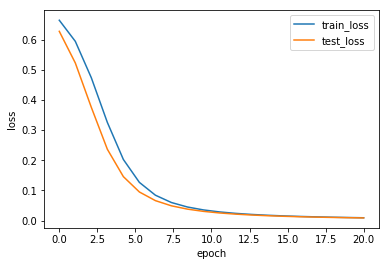

In [309]:
x = np.linspace(0,len(train_ls),len(train_ls))
plt.plot(x,train_ls,label='train_loss',linewidth=1.5)
plt.plot(x,test_ls,label='test_loss',linewidth=1.5)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

**多分类任务**

In [315]:
#生成数据

#下载MNIST手写数字数据集
train_dataset = torchvision.datasets.MNIST(root='./Datasets/MNIST', train=True, transform=transforms.ToTensor(),download=True)
test_dataset = torchvision.datasets.MNIST(root='./Datasets/MNIST', train=False, transform = transforms.ToTensor(),download=True)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

In [344]:
#定义模型参数
num_inputs, num_outputs, num_hiddens = 784, 10, 100

W1 = torch.tensor(np.random.normal(0, 0.01, (num_inputs, num_hiddens)), dtype=torch.float)
b1 = torch.zeros(num_hiddens, dtype = torch.float)
W2 = torch.tensor(np.random.normal(0, 0.01, (num_hiddens, num_outputs)), dtype=torch.float)
b2 = torch.zeros(num_outputs,dtype=torch.float)

params = [W1,b1,W2,b2]
for param in params:
    param.requires_grad_(requires_grad=True)

In [317]:
#定义激活函数
def relu(X):
    return torch.max(input=X, other=torch.tensor(0.0))

In [318]:
def softmax(X):
    X_exp = X.exp()
    partition = X_exp.sum(dim=1, keepdim=True)
    return X_exp / partition

In [319]:
# 定义网络
def net(X):
    X = X.view((-1, num_inputs))
    H = relu(torch.matmul(X, W1) + b1)
    return softmax(torch.matmul(H, W2) + b2)

In [331]:
#定义损失函数
def CrossEntropyLoss(y_hat,y):
    return - torch.log(y_hat.gather(1, y))

In [321]:
#定义优化方法
def sgd(params,lr,batch_size):
    for param in params:
        param.data -= lr*param.grad/batch_size

In [341]:
def train():
    n_epoch = 20
    batch_size = 32
    loss = CrossEntropyLoss
    lr = 0.001
    train_ls, test_ls = [], []
    ls = 0
    count = 0
    for epoch in range(n_epoch):
        for X,y in train_loader:
            l = loss(net(X),y.view(-1,1)).sum()
            l.backward()
            sgd([W1,b1,W2,b2],lr,batch_size)
            W1.grad.data.zero_()
            b1.grad.data.zero_()
            W2.grad.data.zero_()
            b2.grad.data.zero_()
            ls += l.item()
            count += y.shape[0]
        train_ls.append(ls/count)
        ls = 0
        count = 0
        for X,y in test_loader:
            l = loss(net(X),y.view(-1,1)).sum()
            ls += l.item()
            count += y.shape[0]
        test_ls.append(ls/count)
        print('epoch %d,train loss: %f, test loss: %f'%(epoch+1,train_ls[-1],test_ls[-1]))
    return train_ls, test_ls

In [345]:
train_ls, test_ls = train()

epoch 1,train loss: 2.289901, test loss: 2.271932
epoch 2,train loss: 2.234753, test loss: 2.157750
epoch 3,train loss: 2.042238, test loss: 1.835009
epoch 4,train loss: 1.638237, test loss: 1.346576
epoch 5,train loss: 1.199774, test loss: 0.995926
epoch 6,train loss: 0.922588, test loss: 0.798780
epoch 7,train loss: 0.762769, test loss: 0.680142
epoch 8,train loss: 0.663121, test loss: 0.603070
epoch 9,train loss: 0.596067, test loss: 0.548588
epoch 10,train loss: 0.547769, test loss: 0.507976
epoch 11,train loss: 0.511289, test loss: 0.476890
epoch 12,train loss: 0.482683, test loss: 0.452200
epoch 13,train loss: 0.459765, test loss: 0.431764
epoch 14,train loss: 0.440859, test loss: 0.415598
epoch 15,train loss: 0.425161, test loss: 0.401522
epoch 16,train loss: 0.411809, test loss: 0.389653
epoch 17,train loss: 0.400415, test loss: 0.379772
epoch 18,train loss: 0.390542, test loss: 0.370656
epoch 19,train loss: 0.381750, test loss: 0.362970
epoch 20,train loss: 0.374070, test loss

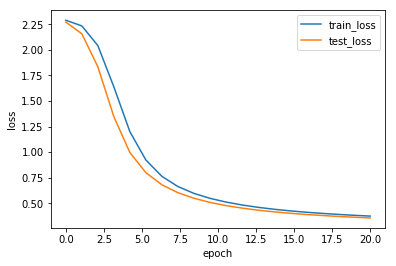

In [346]:
x = np.linspace(0,len(train_ls),len(train_ls))
plt.plot(x,train_ls,label='train_loss',linewidth=1.5)
plt.plot(x,test_ls,label='test_loss',linewidth=1.5)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()